In [ ]:
from pathlib import Path
import re, csv, pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import download as nltk_dl
nltk_dl('punkt')

#paths
NB_DIR = Path.cwd()
DATA_DIR = NB_DIR / "data"
PROC_DIR = DATA_DIR / "processed"
PROC_DIR.mkdir(exist_ok=True)

TWEET_OUT = PROC_DIR / "btc_tweets_with_sentiment.csv"
REDDIT_OUT = PROC_DIR / "reddit_with_sentiment.csv"

TWEET_FILES = ["Bitcoin_tweets.csv", "Bitcoin_tweets_dataset_2.csv"]
REDDIT_FILE = "reddit_cc.csv"
CHUNK_ROWS = 25_000

#helpers
btc_re   = re.compile(r'\b(btc|bitcoin|₿)\b', re.I)
clean_re = re.compile(r'[^a-z0-9\s\.\,\!\?]')

def clean(s: str) -> str:
    s = s.lower()
    s = re.sub(r'https?://\S+|www\.\S+|[@#]\w+|\br/\w+', ' ', s)
    s = clean_re.sub(' ', s)
    return re.sub(r'\s{2,}', ' ', s).strip()

analyzer = SentimentIntensityAnalyzer()
def score(text: str) -> float:
    return analyzer.polarity_scores(text or "")["compound"]

# tweet analysis
first = True
keep_cols = ["date", "text"]

for tf in TWEET_FILES:
    for chunk in pd.read_csv(DATA_DIR / tf,
                             usecols=keep_cols,
                             chunksize=CHUNK_ROWS,
                             engine="python",
                             on_bad_lines="skip"):
        chunk["text"] = chunk["text"].astype(str)
        chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]
        if chunk.empty:
            continue
        chunk["clean_text"] = chunk["text"].map(clean)
        chunk["compound"] = chunk["clean_text"].map(score)
        chunk = chunk.rename(columns={"date": "datetime"})

        mode, header = ("w", True) if first else ("a", False)
        chunk.to_csv(TWEET_OUT, mode=mode, header=header,
                     index=False, quoting=csv.QUOTE_MINIMAL)
        first = False
        print(f"✓ {tf}: +{len(chunk):>6} rows "
              f"(file {TWEET_OUT.stat().st_size/1e6:.1f} MB)")

# reddot analysis
reddit = pd.read_csv(
    DATA_DIR / REDDIT_FILE,
    usecols=["id", "created", "body"],
    engine="python",
    on_bad_lines="skip"
)

reddit["body"] = reddit["body"].astype(str)
reddit = reddit[reddit["body"].str.contains(btc_re, na=False)]

# convert created to datetime
reddit["datetime"] = pd.to_datetime(reddit["created"], unit="s")
reddit = reddit.drop(columns=["created"])

reddit["clean_text"] = reddit["body"].map(clean)
reddit["compound"] = reddit["clean_text"].map(score)

reddit.to_csv(REDDIT_OUT, index=False, quoting=csv.QUOTE_MINIMAL)
print(f"reddit: wrote {len(reddit)} rows "
      f"(file {REDDIT_OUT.stat().st_size/1e6:.1f} MB)")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aanantharajah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 17662 rows (file 3.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 17802 rows (file 7.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 17834 rows (file 11.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 19.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 28.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 35.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 43.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 50.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 58.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 65.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 73.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 81.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 89.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 21510 rows (file 95.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: +  6192 rows (file 97.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24991 rows (file 105.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 113.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 121.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 128.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 136.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 143.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 152.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 160.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 168.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 175.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 184.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 192.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 198.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24996 rows (file 206.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 214.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 221.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 229.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 238.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 246.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 254.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24993 rows (file 261.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24988 rows (file 269.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 277.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 285.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 293.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 301.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 309.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 318.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 326.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24973 rows (file 334.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 342.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 350.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 359.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24995 rows (file 367.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24991 rows (file 374.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24980 rows (file 382.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 390.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24974 rows (file 398.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 406.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24988 rows (file 414.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24990 rows (file 423.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24986 rows (file 431.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24979 rows (file 439.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24980 rows (file 446.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24984 rows (file 454.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 462.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24992 rows (file 471.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 479.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 487.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 496.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 504.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 512.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 520.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 529.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 537.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 545.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 553.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24992 rows (file 561.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 569.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 577.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 586.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 594.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24996 rows (file 602.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 610.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 618.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 627.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 635.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 643.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 652.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 661.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 669.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 677.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 684.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 693.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24996 rows (file 701.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 709.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 717.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 725.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 733.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 742.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 750.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 758.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 767.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 775.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 783.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 791.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 799.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 807.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 815.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24996 rows (file 823.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 832.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 840.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 849.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 857.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 865.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 874.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24996 rows (file 882.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 890.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 899.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 907.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 915.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 923.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 931.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 938.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 947.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 955.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 962.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 971.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 979.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 986.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24993 rows (file 995.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1003.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1011.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1019.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1026.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1033.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1041.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1048.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1056.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1064.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1071.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1079.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1087.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1094.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1102.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 1110.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1118.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1125.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1133.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1141.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1148.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1156.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1164.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1172.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1180.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24997 rows (file 1188.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1195.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1202.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1210.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1218.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1226.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1234.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1242.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1249.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1257.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1265.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1273.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1281.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1289.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1297.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1304.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24999 rows (file 1312.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24998 rows (file 1320.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 25000 rows (file 1328.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24981 rows (file 1336.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24955 rows (file 1343.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24971 rows (file 1351.2 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24926 rows (file 1359.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24944 rows (file 1366.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24951 rows (file 1374.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24961 rows (file 1382.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24967 rows (file 1389.9 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24992 rows (file 1396.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24974 rows (file 1404.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24981 rows (file 1411.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24976 rows (file 1419.3 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24957 rows (file 1427.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24964 rows (file 1434.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24649 rows (file 1442.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 24872 rows (file 1449.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 23403 rows (file 1456.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 23211 rows (file 1463.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets.csv: + 17539 rows (file 1469.1 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets_dataset_2.csv: + 24056 rows (file 1476.5 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets_dataset_2.csv: + 24003 rows (file 1484.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets_dataset_2.csv: + 24516 rows (file 1491.6 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets_dataset_2.csv: + 24361 rows (file 1498.7 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets_dataset_2.csv: + 24227 rows (file 1506.0 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets_dataset_2.csv: + 24166 rows (file 1513.4 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  chunk = chunk[chunk["text"].str.contains(btc_re, na=False)]


✓ Bitcoin_tweets_dataset_2.csv: + 23700 rows (file 1520.8 MB)


/var/folders/c_/985w9gtd70x2fc99qwlqsv5c0000gn/T/ipykernel_3455/2923062468.py:68: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  reddit = reddit[reddit["body"].str.contains(btc_re, na=False)]


✓ reddit: wrote 4376 rows (file 10.8 MB)


In [ ]:
import matplotlib.pyplot as plt

PRICE_MIN_FILE = DATA_DIR / "btcusd_1-min_data.csv"
TWEET_OUT = PROC_DIR / "btc_tweets_with_sentiment.csv"
REDDIT_OUT = PROC_DIR / "reddit_with_sentiment.csv"

#turn minute data into daily OHLCV
price_min = (pd.read_csv(PRICE_MIN_FILE)
               .rename(columns=str.lower))

price_min["datetime"] = pd.to_datetime(price_min["timestamp"], unit="s", utc=True)
price_min = price_min.set_index("datetime").sort_index()

daily = (price_min
         .resample("D")
         .agg({"open":"first", "high":"max", "low":"min",
               "close":"last", "volume":"sum"})
         .dropna(how="all"))

#row level sentiment -> daily mean
def daily_sentiment(csv_path: Path, new_name: str) -> pd.Series:
    df = (pd.read_csv(csv_path, usecols=["datetime", "compound"])
            .assign(datetime=lambda d: pd.to_datetime(
                       d["datetime"], errors="coerce", utc=True))
            .dropna(subset=["datetime"])
            .set_index("datetime")
            .resample("D")["compound"].mean()
            .rename(new_name))
    return df

tweet_daily = daily_sentiment(TWEET_OUT , "tweet_sentiment")
reddit_daily = daily_sentiment(REDDIT_OUT, "reddit_sentiment")

#join daily price with daily sentiment
price_tweet = daily.join(tweet_daily , how="left")
price_reddit = daily.join(reddit_daily, how="left")

price_tweet.to_csv(PROC_DIR / "btc_price_with_tweet_sentiment.csv")
price_reddit.to_csv(PROC_DIR / "btc_price_with_reddit_sentiment.csv")
print("wrote btc_price_with_tweet_sentiment.csv  &  btc_price_with_reddit_sentiment.csv")

#determine weights
ret = price_tweet["close"].pct_change()

corr_tweet = abs(ret.corr(price_tweet ["tweet_sentiment"]))
corr_reddit = abs(ret.corr(price_reddit["reddit_sentiment"]))

if corr_tweet + corr_reddit:
    w_tweet = corr_tweet / (corr_tweet + corr_reddit)
    w_reddit = corr_reddit / (corr_tweet + corr_reddit)
else:
    w_tweet = w_reddit = 0.5

print(f"weights -> tweet={w_tweet:.2f}  reddit={w_reddit:.2f}")

weighted = (w_tweet * tweet_daily .reindex(daily.index).fillna(0) +
            w_reddit * reddit_daily.reindex(daily.index).fillna(0)
           ).rename("weighted_sentiment")

price_weighted = daily.join(weighted, how="left")
price_weighted.to_csv(PROC_DIR / "btc_price_with_weighted_sentiment.csv")
print("wrote btc_price_with_weighted_sentiment.csv")

#pretty plots
def plot_pair(price_ser: pd.Series, sent_ser: pd.Series,
              sent_label: str, styles: dict):
    pair = pd.concat([price_ser, sent_ser], axis=1).dropna()
    if pair.empty:
        print(f"[skip] {sent_label}: no overlapping dates")
        return

    fig, ax1 = plt.subplots(figsize=(9, 4))
    ax1.plot(pair.index, pair["close"], label="BTC Close", **styles["price"])
    ax1.set_ylabel("Price (USD)")

    ax2 = ax1.twinx()
    ax2.plot(pair.index, pair[sent_ser.name], label=sent_label,
             **styles["sentiment"])
    ax2.set_ylabel("Sentiment (compound)")

    ax1.set_title(f"Bitcoin vs. {sent_label} (daily)")
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc="upper left", fontsize=8)
    fig.tight_layout()
    plt.show()

style_dict = {
    "price": {"linewidth": 1.2, "color": "tab:blue"},
    "sentiment": {"linewidth": 1.2},
}

style_dict["sentiment"]["color"] = "tab:orange"
plot_pair(daily["close"], tweet_daily, "Twitter Sentiment", style_dict)

style_dict["sentiment"]["color"] = "tab:green"
plot_pair(daily["close"], reddit_daily, "Reddit Sentiment", style_dict)

style_dict["sentiment"]["color"] = "tab:red"
plot_pair(daily["close"], weighted, "Weighted Sentiment", style_dict)


NameError: name 'DATA_DIR' is not defined

Twitter sign-direction accuracy: 53.712% over 229 days
Reddit sign-direction accuracy: 51.724% over 29 days


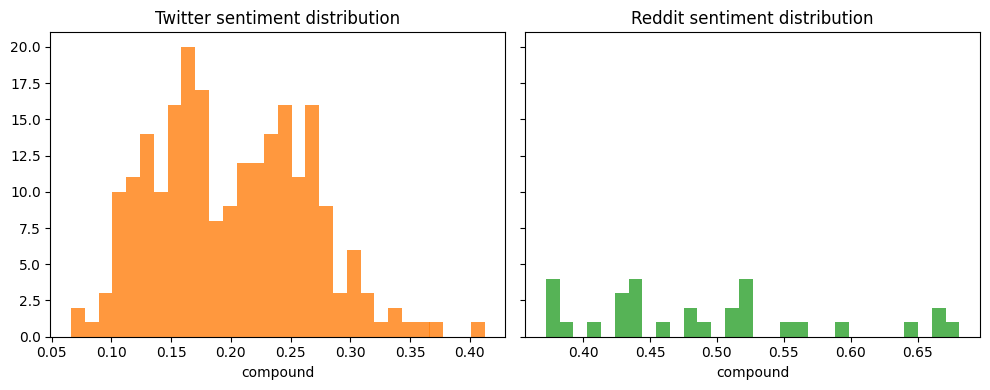


Granger causality test: Twitter sentiment  →  BTC returns
  • lag 1: p = 0.9475
  • lag 2: p = 0.3999
  • lag 3: p = 0.3778
  • lag 4: p = 0.2662
  • lag 5: p = 0.2036
  • lag 6: p = 0.3073
  • lag 7: p = 0.3320

Granger causality test: Reddit sentiment  →  BTC returns
  • lag 1: p = 0.0185
  • lag 2: p = 0.0612
  • lag 3: p = 0.0505
  • lag 4: p = 0.0846
  • lag 5: p = 0.0749
  • lag 6: p = 0.1405
  • lag 7: p = 0.3070


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

#directional accuracy
ret = daily["close"].pct_change()

def sign_accuracy(sent: pd.Series, name: str) -> float:
    df = pd.concat({
        "sent": sent.shift(1),
        "ret":  ret
    }, axis=1).dropna()
    preds = np.sign(df["sent"])
    actual= np.sign(df["ret"])
    acc = (preds == actual).mean()
    print(f"{name} sign-direction accuracy: {acc:.3%} over {len(df)} days")
    return acc

acc_tweet = sign_accuracy(tweet_daily , "Twitter")
acc_reddit = sign_accuracy(reddit_daily, "Reddit")

#sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
axes[0].hist(tweet_daily.dropna(), bins=30, color="tab:orange", alpha=0.8)
axes[0].set_title("Twitter sentiment distribution"); axes[0].set_xlabel("compound")
axes[1].hist(reddit_daily.dropna(), bins=30, color="tab:green" , alpha=0.8)
axes[1].set_title("Reddit sentiment distribution"); axes[1].set_xlabel("compound")
plt.tight_layout(); plt.show()

#granger causality
def run_granger(sent: pd.Series, label: str, maxlag: int = 7):
    df = pd.concat({"ret": ret, "sent": sent}, axis=1).dropna()
    print(f"\nGranger causality test: {label} sentiment  →  BTC returns")
    res = grangercausalitytests(df[["ret", "sent"]], maxlag=maxlag, verbose=False)
    for lag in range(1, maxlag+1):
        p_val = res[lag][0]["ssr_ftest"][1]
        print(f"  • lag {lag}: p = {p_val:.4f}")
    return res

granger_tweet = run_granger(tweet_daily , "Twitter")
granger_reddit = run_granger(reddit_daily, "Reddit")


                               SARIMAX Results                                
Dep. Variable:              log_close   No. Observations:                   24
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  47.776
Date:                Mon, 12 May 2025   AIC                            -87.552
Time:                        20:41:26   BIC                            -83.374
Sample:                             0   HQIC                           -86.646
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sent_lag1     -0.1059      0.058     -1.823      0.068      -0.220       0.008
ar.L1          0.1544      6.454      0.024      0.981     -12.496      12.804
ma.L1         -0.0648      6.286     -0.010      0.9

/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


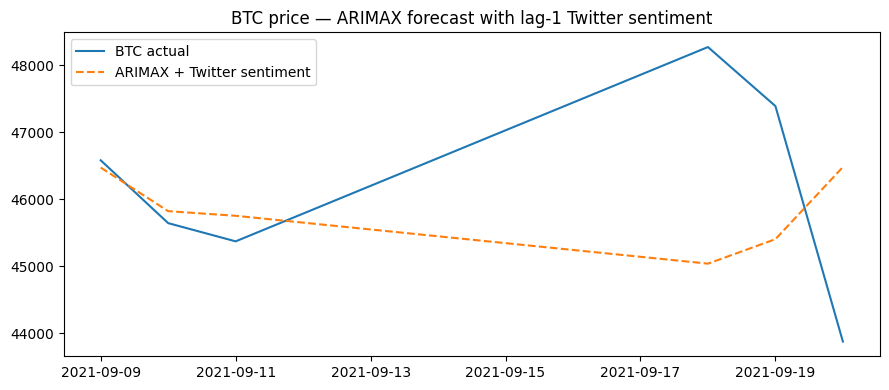

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#arimax on btc price

#load file with sentiment
CSV_FILE = PROC_DIR / "btc_price_with_reddit_sentiment.csv"  # swap for Reddit

df = pd.read_csv(CSV_FILE)

# detect timestamp column
if "date" in df.columns:
    time_col = "date"
elif "datetime" in df.columns:
    time_col = "datetime"
else:
    time_col = df.columns[0]
    df = df.rename(columns={time_col: "timestamp"})
    time_col = "timestamp"

df[time_col] = pd.to_datetime(df[time_col])
df = (df.set_index(time_col)
        .sort_index()
        .asfreq("D"))

#build exogenous regressor
sent_col = "reddit_sentiment"
df["log_close"] = np.log(df["close"])
df["sent_lag1"] = df[sent_col].shift(1)
df = df.dropna(subset=["log_close", "sent_lag1"])

# split 80/20 chronologically
split = int(len(df) * 0.8)
y_train, y_test = df["log_close"].iloc[:split], df["log_close"].iloc[split:]
exog_train = df[["sent_lag1"]].iloc[:split]
exog_test = df[["sent_lag1"]].iloc[split:]

#fit arimax model with regressor
model = SARIMAX(y_train,
                order=(1, 1, 1),
                exog=exog_train,
                enforce_stationarity=False,
                enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary())

#forecast and evaluation
pred = res.get_forecast(steps=len(y_test),
                        exog=exog_test,
                        index=y_test.index)
y_pred = pred.predicted_mean
mae = mean_absolute_error(y_test, y_pred)
print(f"\nTest MAE (log-price): {mae:.5f}")

true_price = np.exp(y_test)
pred_price = np.exp(y_pred)

#prety plots
plt.figure(figsize=(9,4))
plt.plot(true_price, label="BTC actual")
plt.plot(pred_price, label="ARIMAX + Twitter sentiment", linestyle="--")
plt.title("BTC price — ARIMAX forecast with lag-1 Twitter sentiment")
plt.legend(); plt.tight_layout(); plt.show()


Searching orders ...
new best (0, 0, 0)  AIC=927.3
new best (0, 0, 1)  AIC=836.6
new best (0, 0, 2)  AIC=787.7
new best (0, 1, 0)  AIC=-460.3
new best (1, 0, 0)  AIC=-461.8

Best order by AIC: (1, 0, 0)  (AIC=-461.8)
                               SARIMAX Results                                
Dep. Variable:              log_close   No. Observations:                  184
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 233.910
Date:                Mon, 12 May 2025   AIC                           -461.820
Time:                        22:02:05   BIC                           -452.192
Sample:                             0   HQIC                          -457.917
                                - 184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


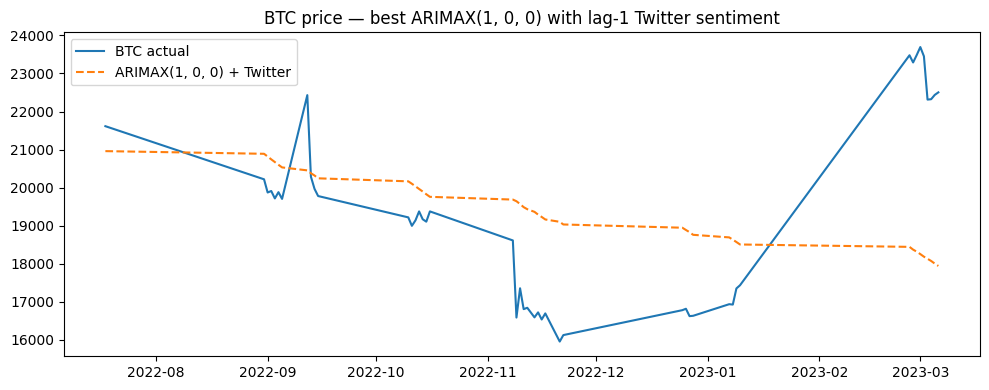

In [ ]:
import warnings, itertools

#grid search for best ARIMAX order

#load file
CSV_FILE = PROC_DIR / "btc_price_with_tweet_sentiment.csv"

df = pd.read_csv(CSV_FILE)
time_col = "date" if "date" in df.columns else ("datetime" if "datetime" in df.columns else df.columns[0])
df[time_col] = pd.to_datetime(df[time_col])
df = df.set_index(time_col).sort_index().asfreq("D")

df["log_close"] = np.log(df["close"])
df["sent_lag1"] = df["tweet_sentiment"].shift(1)
df = df.dropna(subset=["log_close", "sent_lag1"])

split = int(len(df)*0.8)
y_train, y_test = df["log_close"].iloc[:split],  df["log_close"].iloc[split:]
exog_train = df[["sent_lag1"]].iloc[:split]
exog_test = df[["sent_lag1"]].iloc[split:]


p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
orders = list(itertools.product(p_range, d_range, q_range))

best_aic, best_order = np.inf, None
results_dict = {}

print("Searching orders ...")
for order in orders:
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            mod = SARIMAX(y_train, order=order, exog=exog_train,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            res = mod.fit(disp=False)
        results_dict[order] = res.aic
        if res.aic < best_aic:
            best_aic, best_order = res.aic, order
            print(f"new best {order}  AIC={best_aic:.1f}")
    except Exception as e:
        print(f"order {order} failed: {e}")

print(f"\nBest order by AIC: {best_order}  (AIC={best_aic:.1f})")

#refit best model
best_mod = SARIMAX(y_train, order=best_order, exog=exog_train,
                   enforce_stationarity=False, enforce_invertibility=False)
best_res = best_mod.fit(disp=False)
print(best_res.summary())

#forecast and evaluation
pred = best_res.get_forecast(steps=len(y_test),
                             exog=exog_test,
                             index=y_test.index)
y_pred = pred.predicted_mean
mae = mean_absolute_error(y_test, y_pred)
print(f"\nTest MAE (log-price): {mae:.5f}")

true_price = np.exp(y_test)
pred_price = np.exp(y_pred)

plt.figure(figsize=(10,4))
plt.plot(true_price, label="BTC actual")
plt.plot(pred_price, label=f"ARIMAX{best_order} + Twitter", linestyle="--")
plt.title(f"BTC price — best ARIMAX{best_order} with lag-1 Twitter sentiment")
plt.legend(); plt.tight_layout(); plt.show()


MAE on next-day returns: 0.01788


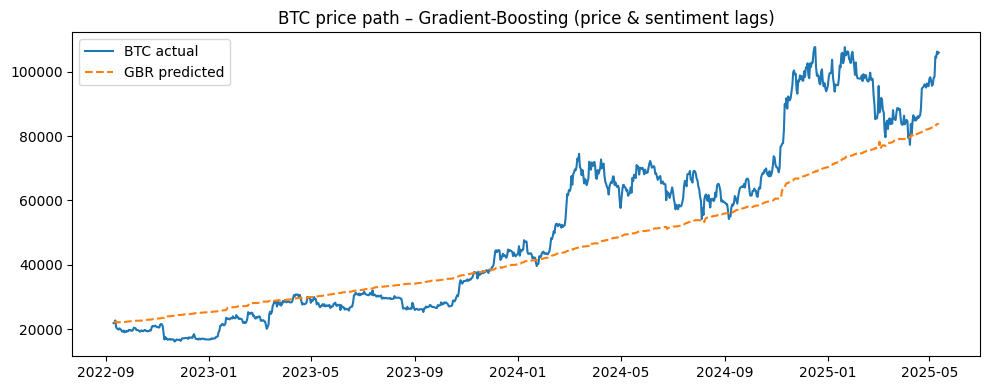


Feature importance:
ret_lag1    0.683657
ret_lag2    0.308896
tw_lag1     0.004557
rd_lag1     0.002890


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#gradient-boosting regressor

#read data
tw = pd.read_csv(PROC_DIR / "btc_price_with_tweet_sentiment.csv")
rd = pd.read_csv(PROC_DIR / "btc_price_with_reddit_sentiment.csv")

time_col = "date" if "date" in tw.columns else "datetime"
tw[time_col] = pd.to_datetime(tw[time_col])
rd[time_col] = pd.to_datetime(rd[time_col])

df = (tw[[time_col, "close", "tweet_sentiment"]]
      .merge(rd[[time_col, "reddit_sentiment"]], on=time_col, how="outer")
      .set_index(time_col)
      .sort_index()
      .asfreq("D"))

#process features
df["ret"] = np.log(df["close"]).diff()

df["tw0"] = df["tweet_sentiment"].fillna(0)
df["rd0"] = df["reddit_sentiment"].fillna(0)

df["tw_lag1"] = df["tw0"].shift(1)
df["rd_lag1"] = df["rd0"].shift(1)
df["ret_lag1"] = df["ret"].shift(1)
df["ret_lag2"] = df["ret"].shift(2)

df = df.dropna(subset=["ret", "ret_lag1", "ret_lag2"])

features = ["tw_lag1", "rd_lag1", "ret_lag1", "ret_lag2"]

#80/20 split train/test
split = int(len(df) * 0.8)
X_train, y_train = df[features].iloc[:split], df["ret"].iloc[:split]
X_test , y_test = df[features].iloc[split:], df["ret"].iloc[split:]
dates_test = y_test.index

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

#model
gbr = GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=3,
        subsample=0.8,
        random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE on next-day returns: {mae:.5f}")

#price path
start_price = df["close"].iloc[split]
true_price = start_price * np.exp(np.cumsum(y_test))
pred_price = start_price * np.exp(np.cumsum(y_pred))

plt.figure(figsize=(10,4))
plt.plot(dates_test, true_price, label="BTC actual")
plt.plot(dates_test, pred_price, label="GBR predicted", linestyle="--")
plt.title("BTC price path – Gradient-Boosting (price & sentiment lags)")
plt.legend(); plt.tight_layout(); plt.show()

#feature importance
imp = pd.Series(gbr.feature_importances_, index=features)\
       .sort_values(ascending=False)\
       .rename("importance")
print("\nFeature importance:")
print(imp.to_string())


Rolling 30-day SARIMAX MAE (log price): 0.02617


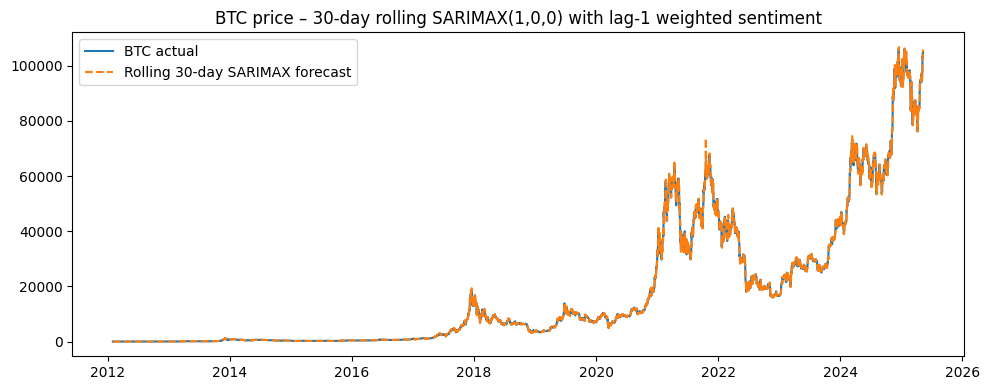

In [ ]:
#30 day rolling SARIMAX

#load file
df = pd.read_csv(PROC_DIR / "btc_price_with_weighted_sentiment.csv")

ts_col = [c for c in df.columns if c in {"date", "datetime"}][0]
df[ts_col] = pd.to_datetime(df[ts_col])
df = df.set_index(ts_col).sort_index().asfreq("D")

df["log_close"] = np.log(df["close"])
df["sent_lag1"] = df["weighted_sentiment"].shift(1).fillna(0)
df = df.dropna(subset=["log_close"])

#rolling window params
WIN = 30
order = (1, 0, 0)

y = df["log_close"]
ex = df["sent_lag1"].to_frame()

start = WIN
preds = []

for t in range(start, len(df)):
    y_train = y.iloc[t-WIN:t]
    ex_train = ex.iloc[t-WIN:t]
    ex_next = ex.iloc[t:t+1]
    
    mod = SARIMAX(y_train, order=order, exog=ex_train,
                  enforce_stationarity=False, enforce_invertibility=False)
    res = mod.fit(disp=False)
    
    pred = res.get_forecast(steps=1, exog=ex_next).predicted_mean.iloc[0]
    preds.append(pred)

pred_series = pd.Series(preds, index=df.index[start:], name="pred_log")

#pretty plots
actual_log = y.iloc[start:]
mae = mean_absolute_error(actual_log, pred_series)
print(f"Rolling 30-day SARIMAX MAE (log price): {mae:.5f}")

actual_price = np.exp(actual_log)
pred_price = np.exp(pred_series)

plt.figure(figsize=(10,4))
plt.plot(actual_price, label="BTC actual")
plt.plot(pred_price , label="Rolling 30-day SARIMAX forecast", linestyle="--")
plt.title("BTC price – 30-day rolling SARIMAX(1,0,0) with lag-1 weighted sentiment")
plt.legend(); plt.tight_layout(); plt.show()


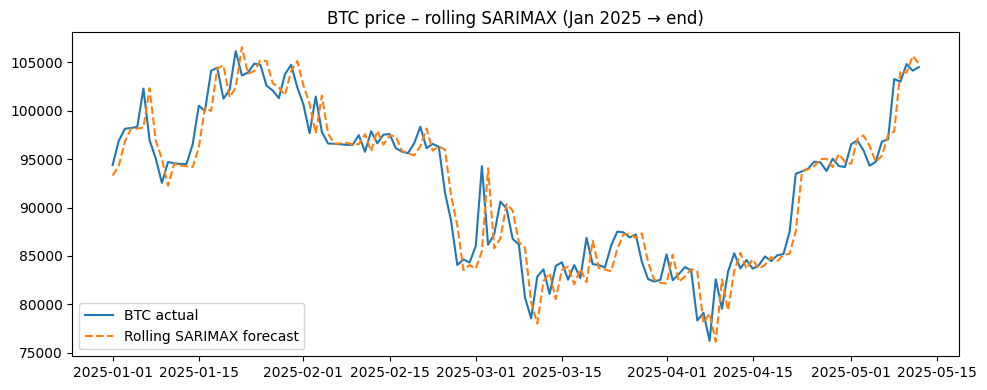

In [ ]:
#zoom in on plot
start_zoom = pd.Timestamp("2025-01-01")

# timezone catch
if actual_price.index.tz is not None:
    actual_price = actual_price.tz_localize(None)
    pred_price = pred_price.tz_localize(None)

zoom_actual = actual_price.loc[start_zoom:]
zoom_pred = pred_price.loc[start_zoom:]

plt.figure(figsize=(10,4))
plt.plot(zoom_actual, label="BTC actual")
plt.plot(zoom_pred, label="Rolling SARIMAX forecast", linestyle="--")
plt.title("BTC price – rolling SARIMAX (Jan 2025 → end)")
plt.legend(); plt.tight_layout(); plt.show()


In [12]:
import scipy.stats as st
import matplotlib.dates as mdates

# Diebold-Mariano test for forecast accuracy
def dm_test(e1, e2, h=1):
    d = (e1**2) - (e2**2)
    T = len(d)
    mean_d = d.mean()
    gamma = [np.sum(d[i:] * d[:T-i]) / T for i in range(1, h)]
    var_d = (np.var(d, ddof=1) +
             2 * np.sum([(1 - k/h) * g for k, g in enumerate(gamma, start=1)]))
    dm_stat = mean_d / np.sqrt(var_d / T)
    pval = 2 * (1 - st.t.cdf(abs(dm_stat), df=T-1))
    return dm_stat, pval, mean_d < 0

# Load price + weighted sentiment
df = pd.read_csv(PROC_DIR / "btc_price_with_weighted_sentiment.csv")

ts = "date" if "date" in df.columns else "datetime"
df[ts] = pd.to_datetime(df[ts]).dt.tz_localize(None)
df = df.set_index(ts).sort_index().asfreq("D")

df["log_close"] = np.log(df["close"])
df["sent_lag1"] = df["weighted_sentiment"].shift(1).fillna(0)
df["ret"] = df["log_close"].diff()
df = df.dropna()

# 1-day rolling SARIMAX
WIN = 30
order = (1, 0, 0)
y_log = df["log_close"]
exog = df[["sent_lag1"]]

start = WIN
fcast = []
for t in range(start, len(df)):
    res = SARIMAX(y_log.iloc[t-WIN:t],
                  order=order,
                  exog=exog.iloc[t-WIN:t],
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit(disp=False)
    fcast.append(res.forecast(exog=exog.iloc[t:t+1]).iloc[0])

model_log = pd.Series(fcast, index=y_log.index[start:], name="sarimax_1d")
naive_log = y_log.shift(1).loc[model_log.index]

mae_model = mean_absolute_error(y_log.loc[model_log.index], model_log)
mae_naive = mean_absolute_error(y_log.loc[naive_log.index], naive_log)
dm_stat, dm_p, better = dm_test(
    (y_log.loc[model_log.index] - model_log).values,
    (y_log.loc[naive_log.index] - naive_log).values)

print("- 1-step rolling -")
print(f"SARIMAX MAE:{mae_model:.5f}")
print(f"Naïve MAE:{mae_naive:.5f}")
print(f"Diebold-Mariano DM={dm_stat:.3f}  p={dm_p:.4f}"
      f"  -> {'SARIMAX better' if better else 'no advantage'}\n")

# 30-day multi-step forecast
train_end_idx = df.index.get_loc("2023-12-31")
y_train = y_log.iloc[:train_end_idx+1]
ex_train = exog.iloc[:train_end_idx+1]

steps = 30
res30 = SARIMAX(y_train, order=order, exog=ex_train,
                enforce_stationarity=False,
                enforce_invertibility=False).fit(disp=False)

ex_future = exog.iloc[train_end_idx+1 : train_end_idx+1+steps]
y_future = y_log.iloc[train_end_idx+1 : train_end_idx+1+steps]
pred30 = res30.forecast(steps=steps, exog=ex_future)

const_pred = np.full_like(y_future, fill_value=y_train.iloc[-1])

mae30_model = mean_absolute_error(y_future, pred30)
mae30_naive = mean_absolute_error(y_future, const_pred)
print("- 30-day multi-step -")
print(f"SARIMAX MAE: {mae30_model:.5f}")
print(f"Const MAE: {mae30_naive:.5f}\n")

# Return-space ARIMAX
ret = df["ret"].dropna()
ex_r = df[["sent_lag1"]].loc[ret.index]

split_r = int(len(ret)*0.8)
ret_tr, ret_te = ret.iloc[:split_r], ret.iloc[split_r:]
exo_tr, exo_te = ex_r.iloc[:split_r], ex_r.iloc[split_r:]

res_r = SARIMAX(ret_tr, order=(1,0,0), exog=exo_tr,
                enforce_stationarity=False,
                enforce_invertibility=False).fit(disp=False)
pred_r = res_r.forecast(steps=len(ret_te), exog=exo_te)

mae_r_model = mean_absolute_error(ret_te, pred_r)
mae_r_zero = mean_absolute_error(ret_te, np.zeros_like(ret_te))
dm_r, p_r, better_r = dm_test((ret_te - pred_r).values,
                              (ret_te - 0).values)

print("- Return-space -")
print(f"ARIMAX MAE: {mae_r_model:.5f}")
print(f"Zero MAE: {mae_r_zero :.5f}")
print(f"DM stat={dm_r:.3f}  p={p_r:.4f}"
      f" -> {'ARIMAX better' if better_r else 'no advantage'}")



/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/envs/cpe595-proj/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/envs/cpe

- 1-step rolling -
SARIMAX MAE:0.02617
Naïve MAE:0.02576
Diebold-Mariano DM=2.123  p=0.0338  -> no advantage

- 30-day multi-step -
SARIMAX MAE: 0.05240
Const MAE: 0.03550

- Return-space -
ARIMAX MAE: 0.01772
Zero MAE: 0.01772
DM stat=1.064  p=0.2877 -> no advantage
